# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.array([[3,1],[2,1]])
np.linalg.inv(A)@np.array([1,0])    # [m,b]=A^{-1}*[1,0]
                                    # linalg.inv -> inversa. @ -> multiplicación matricial

array([ 1., -2.])

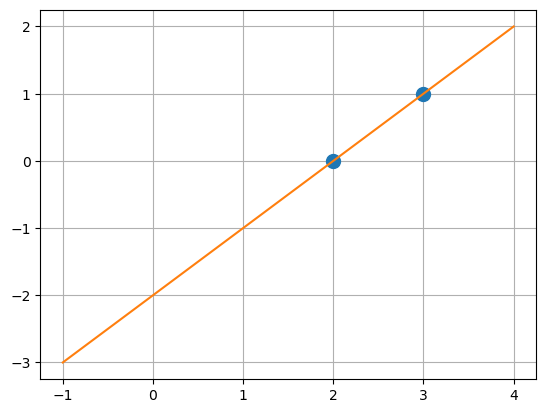

In [3]:
x=[3,2]
y=[1,0]
plt.plot(x,y,'o',ms=10)
x=np.linspace(-1,4,10)
m=1
b=-2
y=m*x+b
plt.plot(x,y)
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
b=np.array([1,0,1])
A=np.array([[1,0,0],
            [1,1,1],
            [1,2,4]])
B=np.linalg.inv(A)@b
B

array([ 1., -2.,  1.])

In [5]:
B[0],B[1],B[2] # Así accedemos a los valores de 'B'

(1.0, -2.0, 1.0)

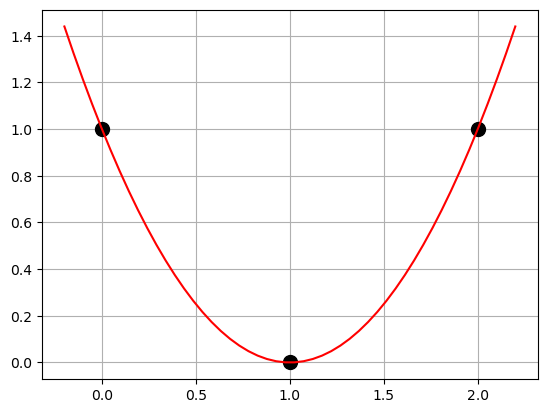

In [8]:
x=[0,1,2]
y=[1,0,1]
plt.plot(x,y,'ok',ms=10)
x=np.linspace(-0.2,2.2,50)
y=B[0]+B[1]*x+B[2]*x**2 # Este es el modelo
plt.plot(x,y,'r')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [9]:
import scipy.optimize as opt

In [14]:
opt.minimize?

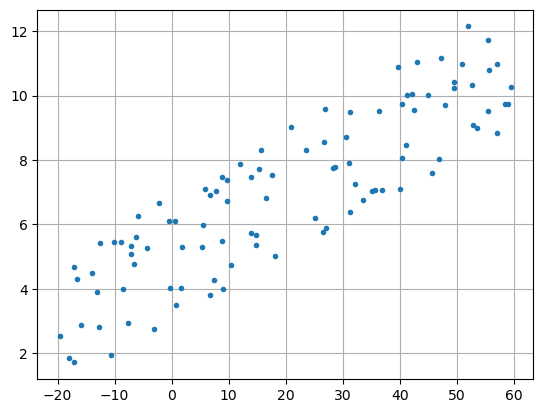

In [15]:
# Definimos los puntos para ajustar
x=np.random.uniform(-20,60,100)
y=1/10*x+5+np.random.uniform(-2,2,100)
plt.plot(x,y,'o',ms=3)
plt.grid()

In [15]:
# Ajuste de una recta
# 
# f=B[0]+B[1]*x, optimizamos para 'B'
def fun(B,x,y):             # Función objetivo (a minimizar)
    f=B[0]+B[1]*x
    return np.sum((y-f)**2) # sumatoria de las diferencias al cuadrado
beta0=np.random.rand(2)     # Necesitamos dos valores (aleatorios) para la evaluación inicial

In [16]:
sol=opt.minimize(fun,beta0,args=(x,y))
sol

      fun: 148.41588548159555
 hess_inv: array([[ 7.92870440e-03, -1.62426830e-04],
       [-1.62426830e-04,  8.61547109e-06]])
      jac: array([-1.33514404e-05,  8.85009766e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 135
      nit: 4
     njev: 41
   status: 2
  success: False
        x: array([4.86986458, 0.10270687])

In [17]:
# suma de errores mínimos al cuadrado
sol.fun

148.41588548159555

In [18]:
# Parámetros óptimos
sol.x

array([4.86986458, 0.10270687])

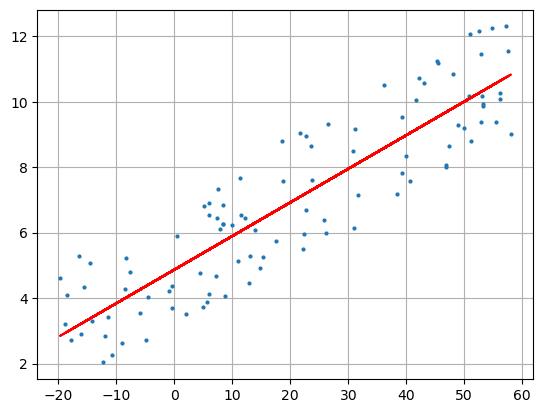

In [19]:
# Gráfica
plt.plot(x,y,'o',ms=2)
f=sol.x[0]+sol.x[1]*x # Modelo óptimo
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

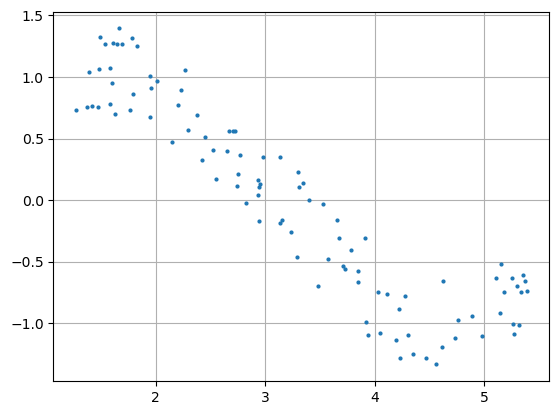

In [16]:
x=np.random.uniform(2/5*np.pi,7/4*np.pi,100)
y=np.sin(x)+np.random.uniform(-0.4,0.4,100)
plt.plot(x,y,'o',ms=2)
plt.grid()

In [17]:
# Criterio de optimización (mínimos cuadrados)
def fun(B,x,y):
    f=B[0]+B[1]*x
    return np.sum((y-f)**2)

In [18]:
# Ajuste lineal
beta0=np.random.rand(2)
sol=opt.minimize(fun,beta0,args=(x,y)) # Mínimos cuadrados
sol

      fun: 10.571643518788264
 hess_inv: array([[ 0.03874243, -0.01040631],
       [-0.01040631,  0.00320935]])
      jac: array([0.00000000e+00, 3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 1.8770128 , -0.58264761])

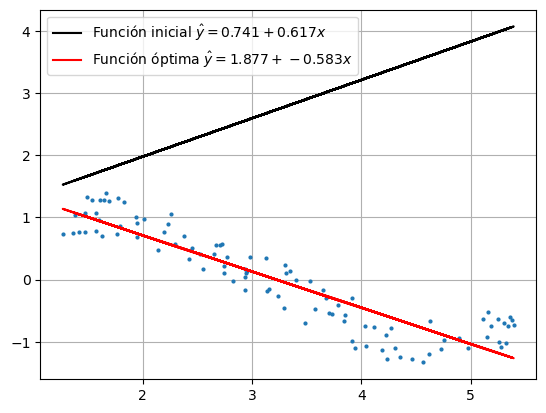

In [19]:
# Gráfica
plt.plot(x,y,'o',ms=2)
f0=beta0[0]+beta0[1]*x    # Función inicial
plt.plot(x,f0,'k',label='Función inicial $\hat{y}='+str(round(beta0[0],3))+'+'+str(round(beta0[1],3))+'x$')
f=sol.x[0]+sol.x[1]*x     # Función óptima
plt.plot(x,f,'r',label='Función óptima $\hat{y}='+str(round(sol.x[0],3))+'+'+str(round(sol.x[1],3))+'x$')
plt.legend()
plt.grid()

---
Para el polinomio de grado dos, necesitamos definir de nuevo el criterio de optiización (minimos cuadrados)

In [20]:
def fun(B,x,y):
    f=B[0]+B[1]*x+B[2]*x**2
    return np.sum((y-f)**2)

In [21]:
beta0=np.random.rand(3) # Queremos ahora 3 elementos aleatorios
sol2=opt.minimize(fun,beta0,args=(x,y))
sol2

      fun: 8.663798614577734
 hess_inv: array([[ 0.27215709, -0.17249234,  0.0242014 ],
       [-0.17249234,  0.11576385, -0.01680569],
       [ 0.0242014 , -0.01680569,  0.00250933]])
      jac: array([0.00000000e+00, 2.38418579e-07, 8.34465027e-07])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([ 2.8203878 , -1.23775434,  0.09781582])

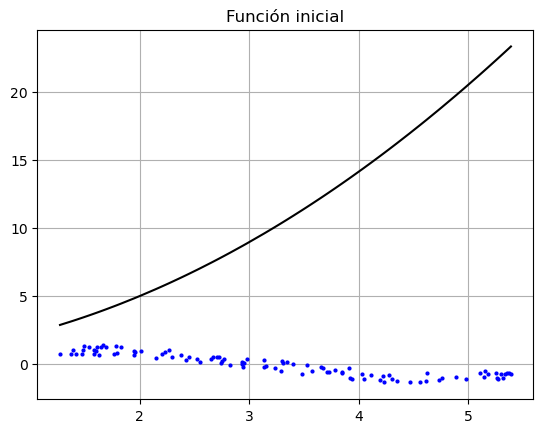

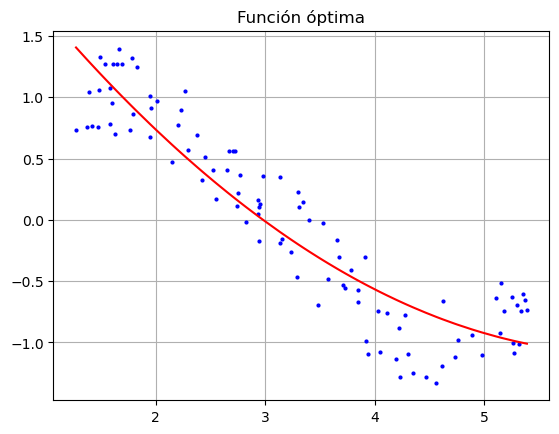

In [29]:
# Gráfica
xs=x.copy()
xs.sort()

plt.figure()
plt.plot(x,y,'ob',ms=2)
f0=beta0[0]+beta0[1]*xs+beta0[2]*xs**2   # Función inicial
plt.plot(xs,f0,'k')
plt.title('Función inicial')
plt.grid()

f=sol2.x[0]+sol2.x[1]*xs+sol2.x[2]*xs**2 # Función óptima
plt.figure()
plt.plot(x,y,'ob',ms=2)
plt.plot(xs,f,'r')
plt.title('Función óptima')
plt.grid()

Para no tener que definir la función a minimizar cada que elevemos el grado del polinomio, definimos un criterio de optimización para cualquier polinomio:
* Encontramos el grado del polinomio a partir de la longitud de $\beta$: `n=len(B)-1`.
* Definimos la función a ajustar como
$$
\begin{bmatrix}
\beta_0\\\beta_1\\\beta_2\\\vdots\\\beta_n
\end{bmatrix}\cdot\begin{bmatrix}
x^0\\x^1\\x^2\\\vdots\\x^n
\end{bmatrix}=\beta_0x^0+\beta_1x^1+\beta_2x^2+\dots+\beta_nx^n
$$

In [30]:
n=5
for i in range(n+1):
    print(i)

0
1
2
3
4
5


In [31]:
def fun(B,x,y):
    n=len(B)-1 # Grado del polinomio
    X=np.array([x**i for i in range(n+1)]) # Vector de potencias de 'x'
    f=np.dot(B,X)
    return np.sum((y-f)**2)

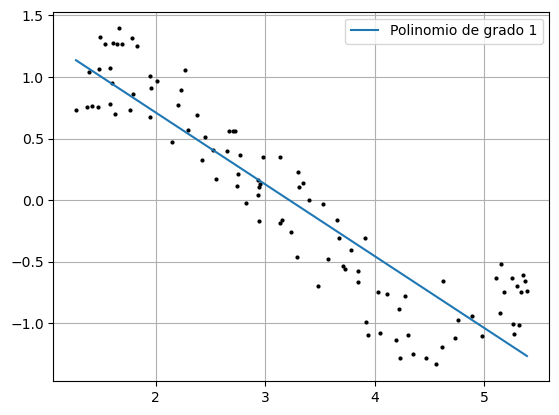

In [34]:
n=1 # Polinomio de grado 1
sol=opt.minimize(fun,np.random.rand(n+1),args=(x,y))
plt.plot(x,y,'ok',ms=2)
X=np.array([xs**i for i in range(n+1)])
f=np.dot(sol.x,X)
plt.plot(xs,f,label='Polinomio de grado '+str(n))
plt.legend()
plt.grid()

In [35]:
sol.fun # Suma de errores al cuadrado

10.571643518788312

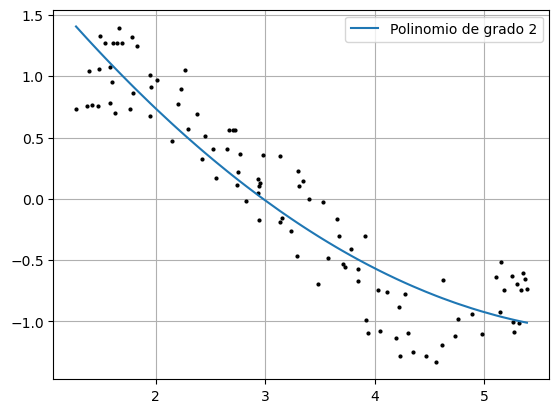

In [36]:
n=2 # Polinomio de grado 2
sol=opt.minimize(fun,np.random.rand(n+1),args=(x,y))
plt.plot(x,y,'ok',ms=2)
X=np.array([xs**i for i in range(n+1)])
f=np.dot(sol.x,X)
plt.plot(xs,f,label='Polinomio de grado '+str(n))
plt.legend()
plt.grid()

In [37]:
sol.fun # Suma de errores al cuadrado

8.663798614577072

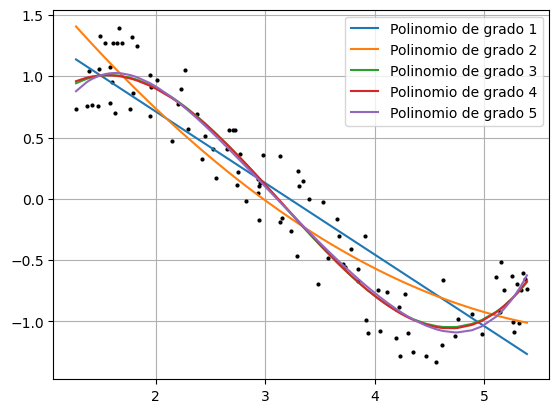

In [39]:
plt.plot(x,y,'ok',ms=2)
for n in range(1,6): # Grados 1,2,3,4,5
    sol=opt.minimize(fun,np.random.rand(n+1),args=(x,y))
    X=np.array([xs**i for i in range(n+1)])
    f=np.dot(sol.x,X)
    plt.plot(xs,f,label='Polinomio de grado '+str(n))
plt.legend()
plt.grid()

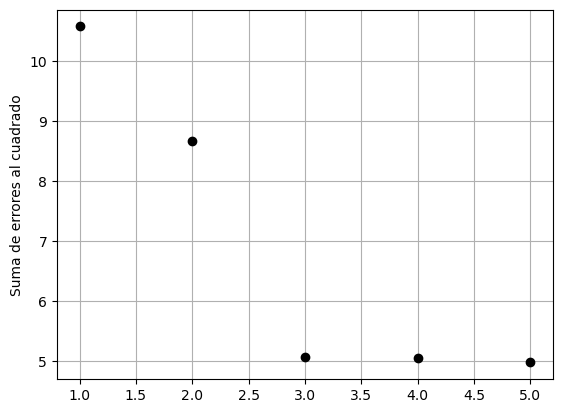

In [42]:
for n in range(1,6):
    sol=opt.minimize(fun,np.random.rand(n+1),args=(x,y))
    plt.plot(n,sol.fun,'ok')
plt.ylabel('Suma de errores al cuadrado')
plt.grid()

In [46]:
for n in range(1,6):
    sol=opt.minimize(fun,np.random.rand(n+1),args=(x,y))
    print('{}: '.format(n),sol.x)

1:  [ 1.87701269 -0.58264757]
2:  [ 2.82038783 -1.23775436  0.09781582]
3:  [-1.12992109  3.04815937 -1.28950356  0.13717331]
4:  [-0.79605466  2.56123789 -1.04325285  0.08544283  0.00384614]
5:  [-4.6931572   9.75792696 -6.06047107  1.74224183 -0.2566092   0.01567464]


## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [49]:
def ridge(B,x,y,L):
    n=len(B)-1
    X=np.array([x**i for i in range(n+1)])
    f=np.dot(B,X)
    return np.sum((y-f)**2)+L*np.sum(B**2)

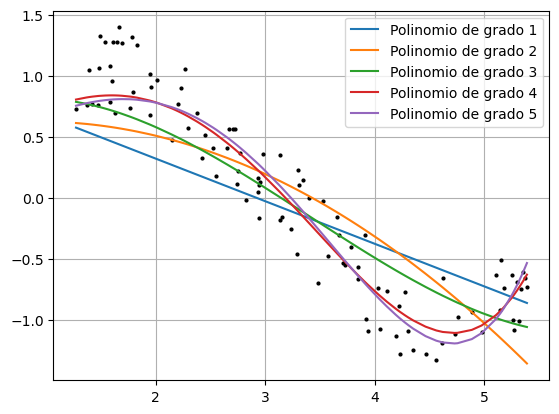

In [53]:
plt.plot(x,y,'ok',ms=2)
for n in range(1,6): # Grados 1,2,3,4,5
    sol=opt.minimize(ridge,np.random.rand(n+1),args=(x,y,10))
    X=np.array([xs**i for i in range(n+1)])
    f=np.dot(sol.x,X)
    plt.plot(xs,f,label='Polinomio de grado '+str(n))
plt.legend()
plt.grid()

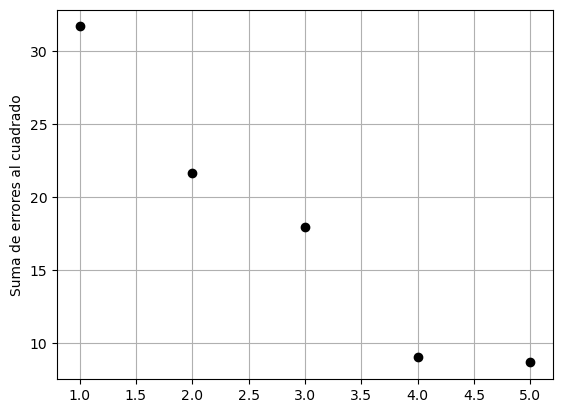

In [55]:
for n in range(1,6):
    sol=opt.minimize(ridge,np.random.rand(n+1),args=(x,y,10))
    plt.plot(n,sol.fun,'ok')
plt.ylabel('Suma de errores al cuadrado')
plt.grid()

In [56]:
for n in range(1,6):
    sol=opt.minimize(ridge,np.random.rand(n+1),args=(x,y,10))
    print('{}: '.format(n),sol.x)

1:  [ 1.01667566 -0.34867067]
2:  [ 0.54186796  0.18020367 -0.0987915 ]
3:  [ 0.5930676   0.50693405 -0.32009629  0.0313815 ]
4:  [ 0.30220151  0.35857701  0.24894952 -0.20725314  0.02648112]
5:  [ 0.29480258  0.3106855   0.18015894 -0.10958979 -0.00477784  0.00295586]


### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [57]:
def lasso(B,x,y,L):
    n=len(B)-1
    X=np.array([x**i for i in range(n+1)])
    f=np.dot(B,X)
    return np.sum((y-f)**2)+L*np.sum(np.abs(B))

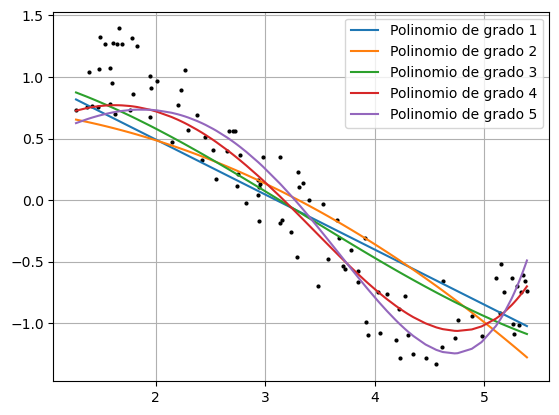

In [58]:
plt.plot(x,y,'ok',ms=2)
for n in range(1,6): # Grados 1,2,3,4,5
    sol=opt.minimize(lasso,np.random.rand(n+1),args=(x,y,10))
    X=np.array([xs**i for i in range(n+1)])
    f=np.dot(sol.x,X)
    plt.plot(xs,f,label='Polinomio de grado '+str(n))
plt.legend()
plt.grid()

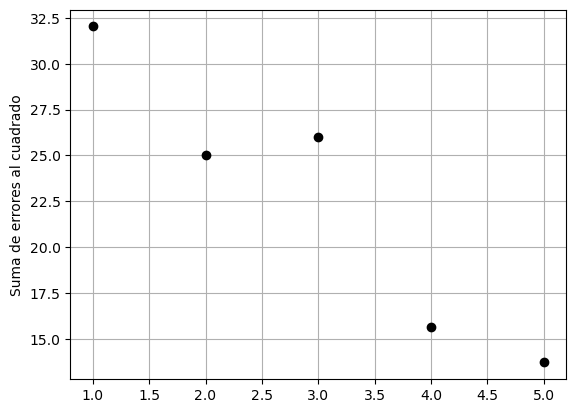

In [59]:
for n in range(1,6):
    sol=opt.minimize(lasso,np.random.rand(n+1),args=(x,y,10))
    plt.plot(n,sol.fun,'ok')
plt.ylabel('Suma de errores al cuadrado')
plt.grid()

In [60]:
for n in range(1,6):
    sol=opt.minimize(lasso,np.random.rand(n+1),args=(x,y,10))
    print('{}: '.format(n),sol.x)

1:  [ 1.38552545 -0.44649102]
2:  [ 8.15863350e-01 -3.09776552e-09 -7.27524588e-02]
3:  [ 1.09554910e+00 -2.72604717e-10 -1.69121464e-01  1.75529974e-02]
4:  [-6.75924196e-10  7.78582084e-01  4.45331981e-04 -1.43550850e-01
  2.08310463e-02]
5:  [ 2.90577140e-04  5.38740984e-01  1.39914494e-04 -1.05935277e-08
 -3.28849595e-02  5.35117987e-03]
